## View data about ingredients

Danh sách category:
- alcoholic_beverages
- beverages
- cakes
- candies
- cereals_grains
- cold_cuts:_sausages_&_ham
- dried_fruits
- fresh_fruits
- fresh_meat
- fruit_jam
- grains_staples
- ice_cream_&_cheese
- instant_foods
- milk
- others
- seafood_&_fish_balls
- seasonings
- snacks
- vegetables
- yogurt

Số lượng phần tử mỗi category:
others: 1086
fruit_jam: 60
fresh_meat: 671
seafood_&_fish_balls: 434
cold_cuts:_sausages_&_ham: 66
seasonings: 1427
vegetables: 1448
grains_staples: 573
snacks: 570
alcoholic_beverages: 102
fresh_fruits: 469
milk: 150
cakes: 39
candies: 202
cereals_grains: 27
dried_fruits: 171
beverages: 379
instant_foods: 92
ice_cream_&_cheese: 129
yogurt: 17


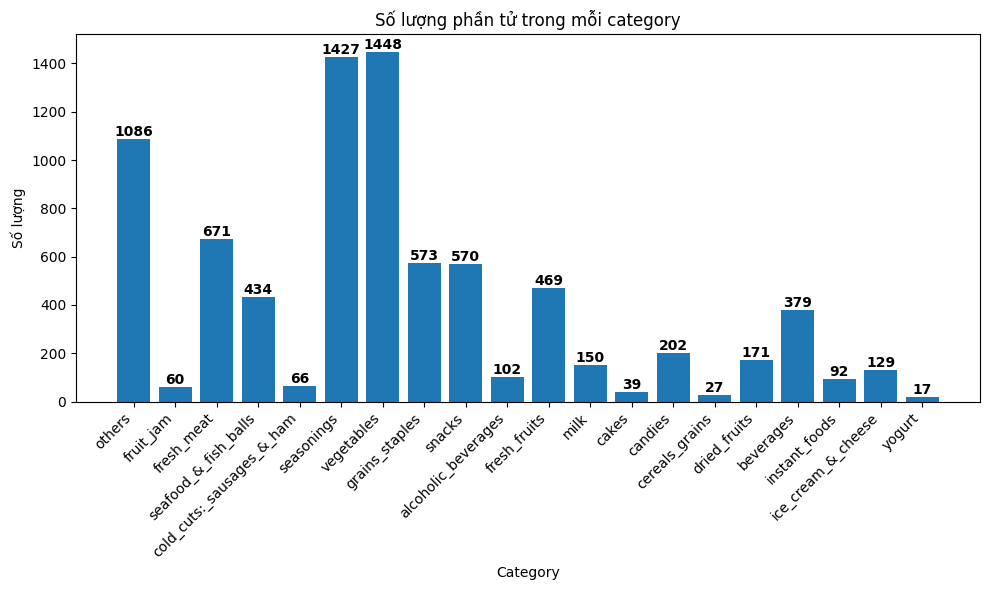

In [2]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# ---- Đọc dữ liệu JSON ----
json_path = r"C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\ingredient_knowledge_base.json" 
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# ---- Lấy danh sách category ----
categories = [item["category"] for item in data if "category" in item]

# ---- In ra các category duy nhất ----
unique_categories = sorted(set(categories))
print("Danh sách category:")
for c in unique_categories:
    print("-", c)

# ---- Đếm số lượng phần tử mỗi category ----
category_counts = Counter(categories)
print("\nSố lượng phần tử mỗi category:")
for cat, count in category_counts.items():
    print(f"{cat}: {count}")

# ---- Visualize ----
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.keys(), category_counts.values())
# Hiển thị số lượng trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )
plt.xticks(rotation=45, ha="right")
plt.title("Số lượng phần tử trong mỗi category")
plt.xlabel("Category")
plt.ylabel("Số lượng")
plt.tight_layout()
plt.show()

In [ ]:
categories = {
    "alcoholic_beverages": "đồ uống có cồn",
    "beverages": "đồ uống",
    "cakes": "bánh ngọt",
    "candies": "kẹo",
    "cereals_grains": "ngũ cốc và hạt",
    "cold_cuts:_sausages_&_ham": "thịt nguội, xúc xích và giăm bông",
    "dried_fruits": "trái cây sấy khô",
    "fresh_fruits": "trái cây tươi",
    "fresh_meat": "thịt tươi",
    "fruit_jam": "mứt trái cây",
    "grains_staples": "lương thực chính (gạo, ngô, lúa mì, v.v.)",
    "ice_cream_&_cheese": "kem và phô mai",
    "instant_foods": "thực phẩm ăn liền",
    "milk": "sữa",
    "others": "khác",
    "seafood_&_fish_balls": "hải sản và cá viên",
    "seasonings": "gia vị",
    "snacks": "đồ ăn vặt",
    "vegetables": "rau củ",
    "yogurt": "sữa chua"
}

## Get nutri

In [4]:
import json

file_ingredients = r'C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\ingredient_knowledge_base.json'
with open(file_ingredients, 'r', encoding='utf-8') as f:
    raw = json.load(f)
ingredients = []
for raw_ingredient in raw[:10]:
    ingredient = {
        'name_vi': raw_ingredient['name_vi'],
        'name_en': raw_ingredient['name_en']
    }
    ingredients.append(ingredient)
for i in ingredients:
    print(i)

{'name_vi': 'all purpose cream', 'name_en': 'All-purpose cream -> Sour cream'}
{'name_vi': 'anh đào ngâm đường cắt nhỏ', 'name_en': 'Candied Cherries Cut Small'}
{'name_vi': 'axit citric', 'name_en': 'Citric Acid'}
{'name_vi': 'ba ba', 'name_en': 'Softshell turtle'}
{'name_vi': 'ba chỉ', 'name_en': 'Pork belly'}
{'name_vi': 'ba chỉ bò', 'name_en': 'Beef brisket'}
{'name_vi': 'ba chỉ bò mỹ', 'name_en': 'Beef brisket'}
{'name_vi': 'ba chỉ rút sườn', 'name_en': 'Pork ribeye'}
{'name_vi': 'ba khía', 'name_en': 'Shrimp'}
{'name_vi': 'ba rọi heo', 'name_en': 'Pork belly'}


In [ ]:
import requests
from requests_oauthlib import OAuth1
import time
import json
import os
from dotenv import load_dotenv
from tqdm import tqdm

load_dotenv()
CONSUMER_KEY = os.getenv('CONSUMER_KEY')
CONSUMER_SECRET = os.getenv('CONSUMER_SECRET')
BASE_URL = "https://platform.fatsecret.com/rest/server.api"

In [36]:
def search_food(query):
    auth = OAuth1(CONSUMER_KEY, CONSUMER_SECRET)
    params = {
        "method": "foods.search",
        "search_expression": query,
        "format": "json"
    }

    res = requests.get(BASE_URL, params=params, auth=auth).json()
    # Nếu có lỗi từ API
    if "error" in res:
        raise Exception(res["error"]["message"])
    # Không có kết quả
    if "foods" not in res or "food" not in res["foods"]:
        raise Exception("Missing field 'food' in response")

    food = res["foods"]["food"][0]
    return food['food_description']

In [45]:
def get_input(input_file):
    if input_file.endswith('.json'):
        with open(input_file, 'r', encoding='utf-8') as fin:
            ingredients = json.load(fin)
    elif input_file.endswith('.txt'):
        ingredients = []
        with open(input_file, 'r', encoding='utf-8') as fin:
            for line in fin:
                id, name, _ = line.strip().split('\t')
                ingre = {
                    'id': id,
                    'name_en': name
                }
                ingredients.append(ingre)
    else:
        return None
    return ingredients

In [ ]:
#input_file = './data/ingredient_v1.json'
input_file = './data/tmp/pre_error.txt'
nutri_file = './data/tmp/ingredient_v1_nutri.jsonl'   # JSON Lines
error_file = './data/tmp/error.txt'

BATCH_SIZE = 50   # mỗi 100 nguyên liệu thì flush xuống file

ingredients = get_input(input_file)

batch_nutri = []
batch_error = []

for ingre in tqdm(ingredients):
    try:
        time.sleep(0.2)
        item = ingre['name_en']
        food = search_food(item)

        batch_nutri.append({
            "id": ingre['id'],
            "name": ingre['name_en'],
            "nutrition": food
        })

    except Exception as e:
        batch_error.append(f"{ingre['id']}\t{ingre['name_en']}\t{str(e)}")

    # ------------------------------------------------
    # GHI FILE THEO BATCH
    # ------------------------------------------------
    if len(batch_nutri) >= BATCH_SIZE:
        with open(nutri_file, "a", encoding='utf-8') as f:
            for row in batch_nutri:
                f.write(json.dumps(row, ensure_ascii=False) + "\n")
        batch_nutri = []   # clear batch

    if len(batch_error) >= 20:
        with open(error_file, "a", encoding='utf-8') as f:
            for line in batch_error:
                f.write(line + "\n")
        batch_error = []   # clear batch

# ------------------------------------------------
# GHI NỐT PHẦN CÒN LẠI
# ------------------------------------------------
if batch_nutri:
    with open(nutri_file, "a", encoding='utf-8') as f:
        for row in batch_nutri:
            f.write(json.dumps(row, ensure_ascii=False) + "\n")

if batch_error:
    with open(error_file, "a", encoding='utf-8') as f:
        for line in batch_error:
            f.write(line + "\n")

print("\n DONE!")
print(f"✔ Saved nutrition batch-wise → {nutri_file}")
print(f"✔ Saved errors → {error_file}")


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


 DONE!
✔ Saved nutrition batch-wise → ./data/tmp/ingredient_v1_nutri.jsonl
✔ Saved errors → ./data/tmp/error.txt


In [1]:
import json
import re

def parse_nutrition(nutrition_str):
    """
    Chuyển chuỗi nutrition dạng:
        "Per 178g - Calories: 227kcal | Fat: 3.51g | Carbs: 50.17g | Protein: 2.21g"
    thành dict:
        {
            "per": "178g",
            "calories": 227,
            "fat": 3.51,
            "carbs": 50.17,
            "protein": 2.21
        }
    """
    result = {}
    
    # Lấy phần "Per ..."
    per_match = re.search(r"Per\s+([^-\n]+)", nutrition_str)
    if per_match:
        result["per"] = per_match.group(1).strip()

    # Lấy Calories
    cal_match = re.search(r"Calories:\s*([\d\.]+)", nutrition_str)
    if cal_match:
        result["calories"] = float(cal_match.group(1))

    # Lấy Fat, Carbs, Protein
    for key in ["Fat", "Carbs", "Protein"]:
        match = re.search(rf"{key}:\s*([\d\.]+)", nutrition_str)
        if match:
            result[key.lower()] = float(match.group(1))

    return result


output = "./data/ingredient_v1_nutri_v2.jsonl"
input = './data/tmp/ingredient_v1_nutri.jsonl'

ingredients = []
with open(input, 'r', encoding='utf-8') as fin:
    for line in fin:
        line = line.strip()
        data = json.loads(line)
        data['nutrition'] = parse_nutrition(data["nutrition"])
        ingredients.append(data)

with open(output, 'a', encoding='utf-8') as fout:
    for ingre in ingredients:
        fout.write(json.dumps(ingre, ensure_ascii=False) + '\n')
    

## Filter recipes and ingredients

In [16]:
#TODO: Loại các ingredient có - > \ trong name_en. Done
#TODO: Loại các recipe có nguyên liệu có đơn vị 'ít', hay những đơn vị không hợp lệ khác
#TODO: xóa các ingredient đã bị xóa trong recipe

In [17]:
# oz
# tbsp : thìa canh

### Eliminate ingredients having unexpected characters

In [18]:
import re

input_list = ["hello", "user-name", "data/file", "world", "test.case", "python"]

# Tạo pattern regex: [-/.] nghĩa là tìm ký tự - HOẶC / HOẶC .
# Lưu ý: Dấu . trong regex cần escape (\.) nếu ở ngoài ngoặc vuông, 
# nhưng trong [] thì thường được hiểu là nghĩa đen. Để an toàn ta dùng \.
pattern = r"[-/\.]"

# Giữ lại chuỗi nếu re.search KHÔNG tìm thấy pattern
clean_list = [s for s in input_list if not re.search(pattern, s)]

print(clean_list)
# Kết quả: ['hello', 'world', 'python']

['hello', 'world', 'python']


In [19]:
import json
import re

file_ingredients = r'C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\ingredient_knowledge_base.json'
with open(file_ingredients, 'r', encoding='utf-8') as f:
    raw = json.load(f)

# Tạo pattern regex: [-/.] nghĩa là tìm ký tự - HOẶC / HOẶC .
# Lưu ý: Dấu . trong regex cần escape (\.) nếu ở ngoài ngoặc vuông, 
# nhưng trong [] thì thường được hiểu là nghĩa đen. Để an toàn ta dùng \.
pattern = r"[-/\.]"

ingredients = []
for raw_ingredient in raw:
    name_vi = raw_ingredient['name_vi']
    name_en = raw_ingredient['name_en']
    if not re.search(pattern, name_vi) and not re.search(pattern, name_en):
        ingredient = {
            'name_vi': name_vi,
            'name_en': name_en,
            'cacategory': raw_ingredient['category']
        }
        ingredients.append(ingredient)

In [20]:
import json

file_ingredients = r'C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\ingredient_knowledge_base.json'
with open(file_ingredients, 'r', encoding='utf-8') as f:
    raw = json.load(f)

In [21]:
len(raw)

8112

In [22]:
ingredients = [
    {
        'id': item['id'],
        'name_vi': item['name_vi'],
        'name_en': item['name_en'],
        'category': item['category']
    }
    for item in raw
    if not any(char in item['name_vi'] + item['name_en'] for char in '-/.')
]

In [23]:
len(ingredients)

7489

In [24]:
from typing import DefaultDict
file_recipe = r'C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\dish_knowledge_base.json'
with open(file_recipe, 'r', encoding='utf-8') as f:
    recipes = json.load(f)
ingredients_unit = DefaultDict(set)
for recipe in recipes:
    for ingredient in recipe['ingredients']:
        ingredients_unit[ingredient['ingredient_id']].add(ingredient['unit'])

In [25]:
len(ingredients_unit)

8070

In [26]:
for ingredient in ingredients:
    ingredient['unit'] = list(ingredients_unit[ingredient['id']])

In [27]:
ingredients_unit

defaultdict(set,
            {'ingre04303': {'gr', 'kg'},
             'ingre01354': {'g',
              'gr',
              'gram',
              'kg',
              'lát',
              'quả',
              'trái',
              'ít'},
             'ingre02673': {'bó',
              'chén',
              'cái',
              'cây',
              'củ',
              'g',
              'gr',
              'gram',
              'lá',
              'muỗng',
              'muỗng canh',
              'muỗng cà phê',
              'nhánh',
              'ít'},
             'ingre06233': {'bó',
              'cây',
              'g',
              'gr',
              'gram',
              'hạt',
              'muỗng canh',
              'nhánh',
              'ít'},
             'ingre03268': {'g', 'gr', 'gram', 'kg', 'quả', 'trái'},
             'ingre08055': {'g',
              'gr',
              'gram',
              'lát',
              'muỗng',
              'muỗng canh',
             

In [28]:
out_file = './data/ingredient_v1.json'
with open(out_file, 'w', encoding='utf-8') as fout:
    json.dump(ingredients, fout, ensure_ascii=False, indent=2)